In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv("./SaYoPillow.csv")


In [13]:
df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [17]:
df.head(3)

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.60,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.88,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.00,95.000,85.00,7.000,60.00,1


In [19]:
print(df.head())

      sr      rr       t      lm      bo    rem   sr.1     hr  sl
0  93.80  25.680  91.840  16.600  89.840  99.60  1.840  74.20   3
1  91.64  25.104  91.552  15.880  89.552  98.88  1.552  72.76   3
2  60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00   1
3  85.76  23.536  90.768  13.920  88.768  96.92  0.768  68.84   3
4  48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12   0


In [21]:
df.isnull().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [23]:
df.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [25]:
print(df.columns)

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')


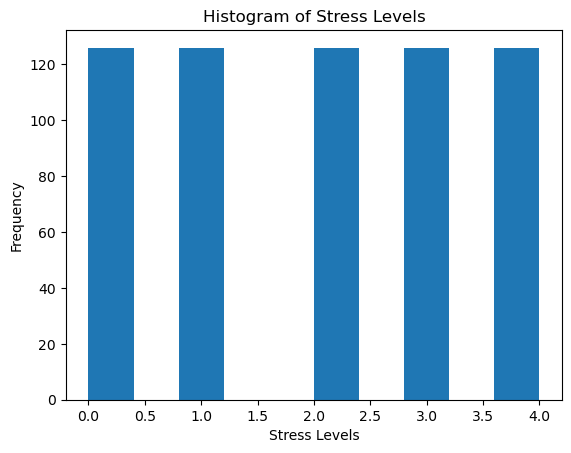

In [27]:
plt.hist(df['sl'])
plt.title('Histogram of Stress Levels')
plt.xlabel('Stress Levels')
plt.ylabel('Frequency')
plt.show()

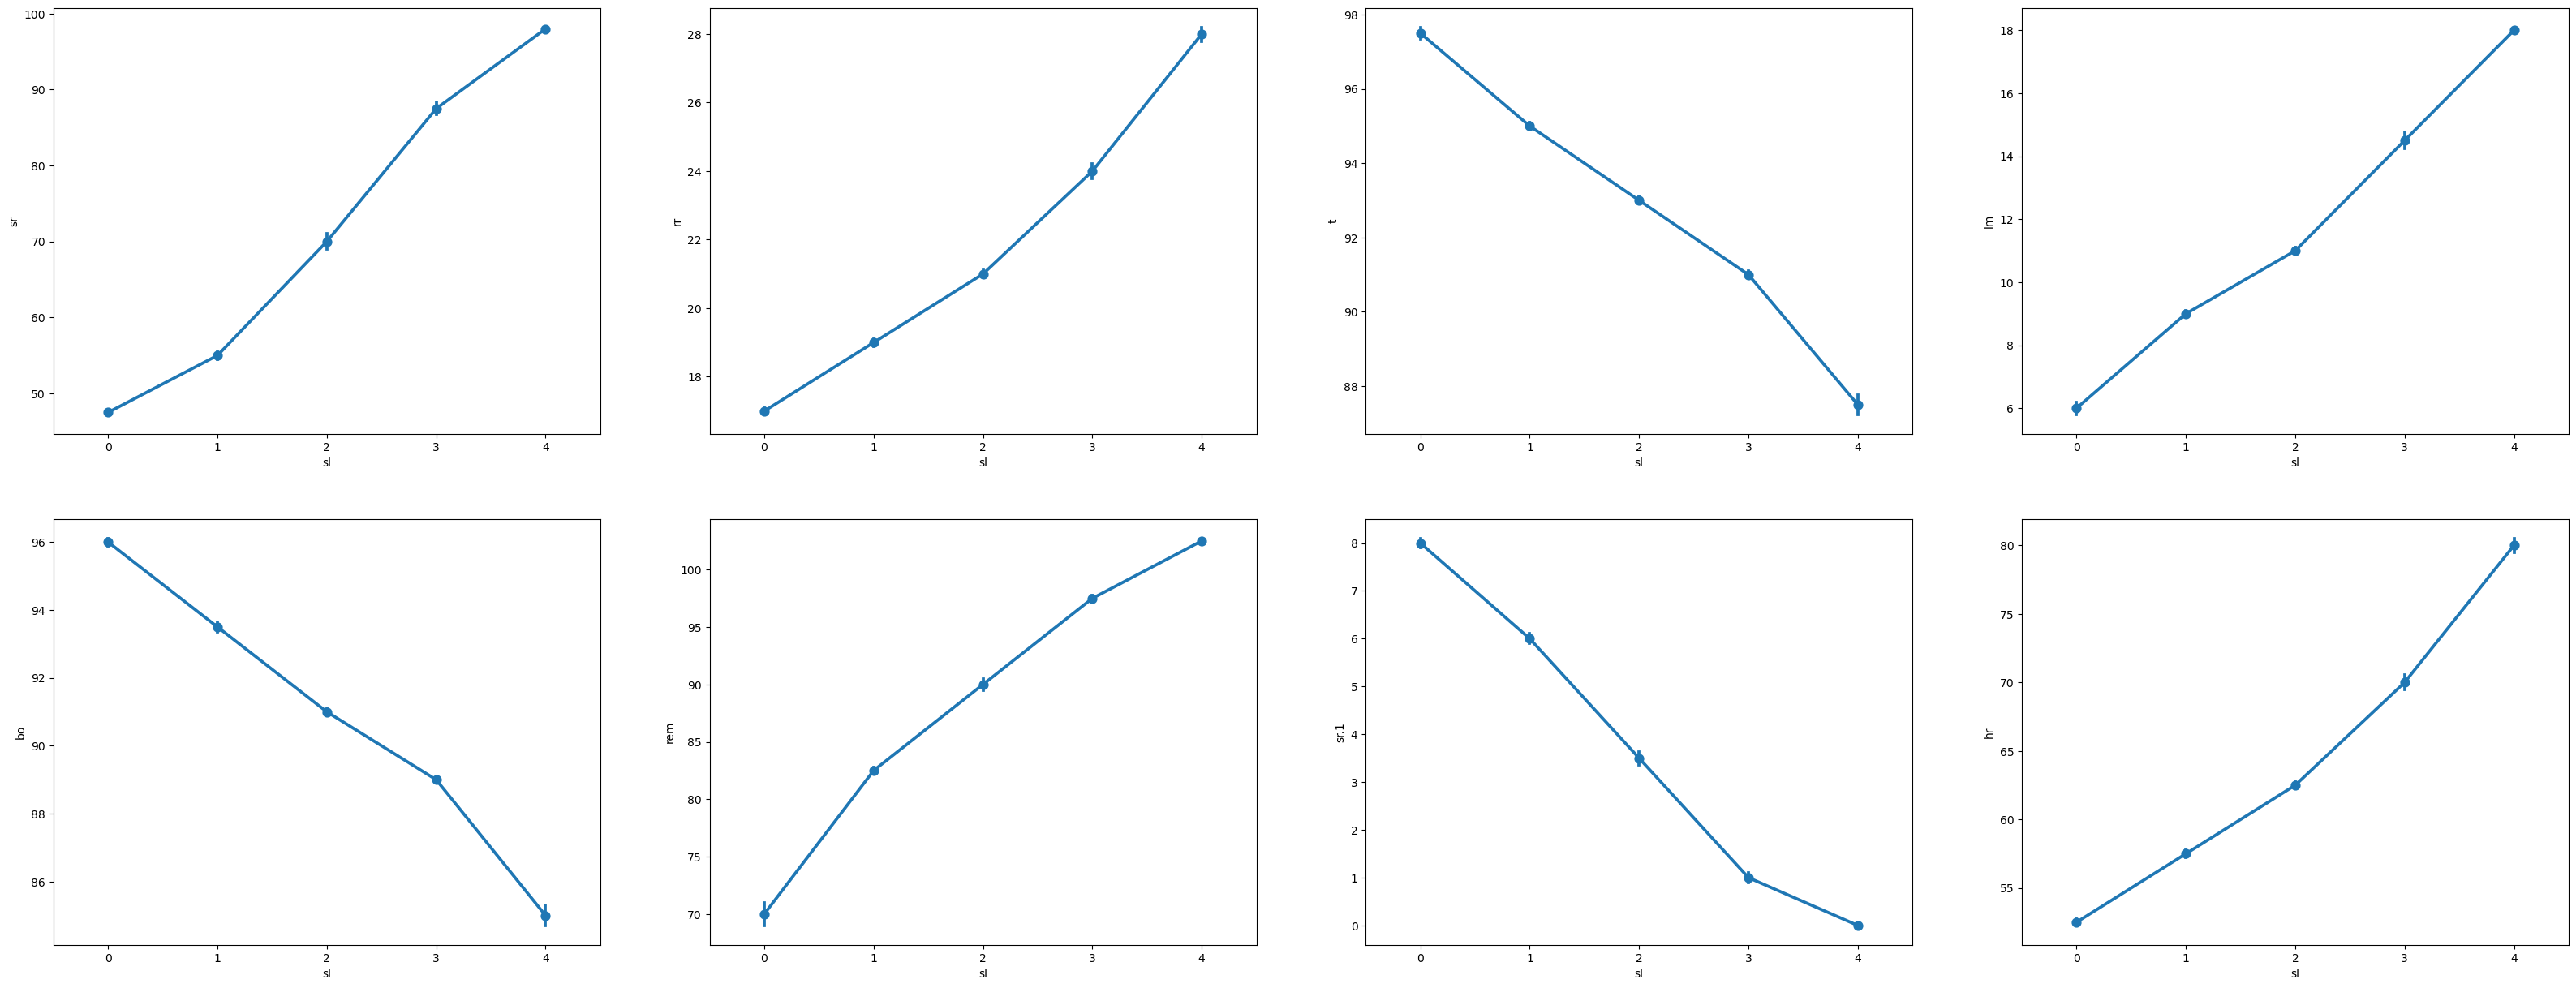

In [28]:

data = df.copy()
fig = plt.figure(figsize=(40, 15))
rows = 2
columns = 4
for i in range(len(data.columns[:-1])):
  fig.add_subplot(rows, columns, (i+1))
  img = sns.pointplot(x='sl',y=df.columns[i],data=df)
plt.show()

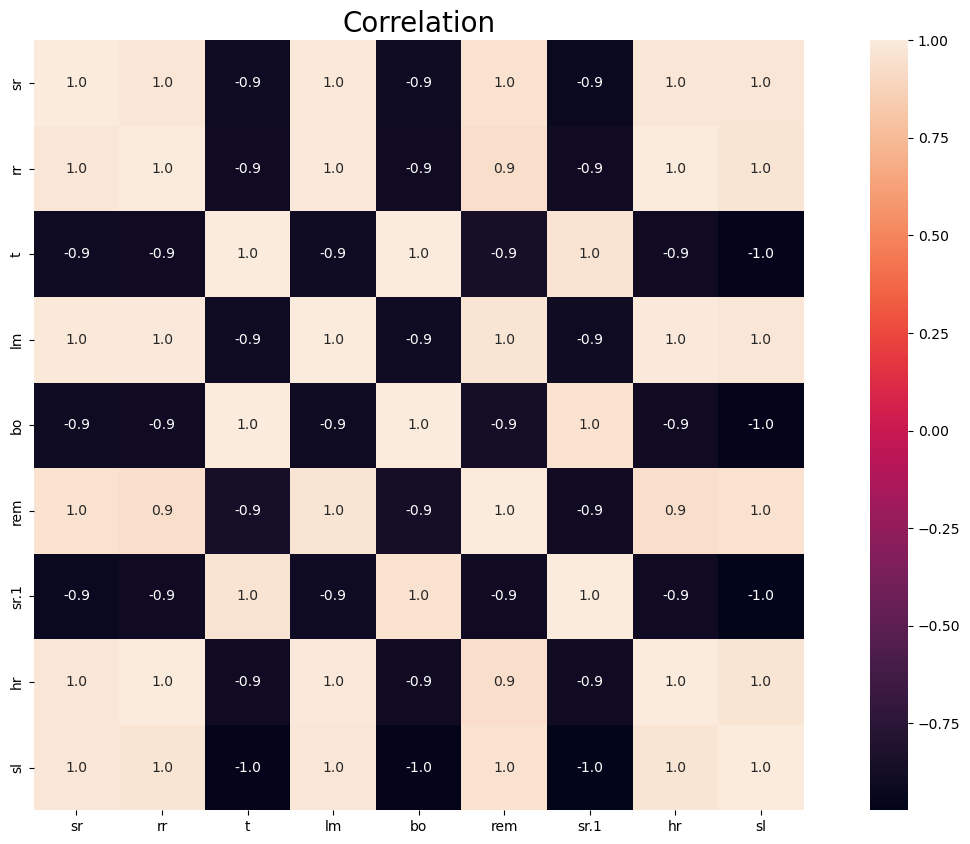

In [31]:

plt.figure(figsize = (17,10))
sns.heatmap(df.corr(), annot=True, square=True, fmt='.1f')
plt.title('Correlation', fontsize = 20)
plt.show()

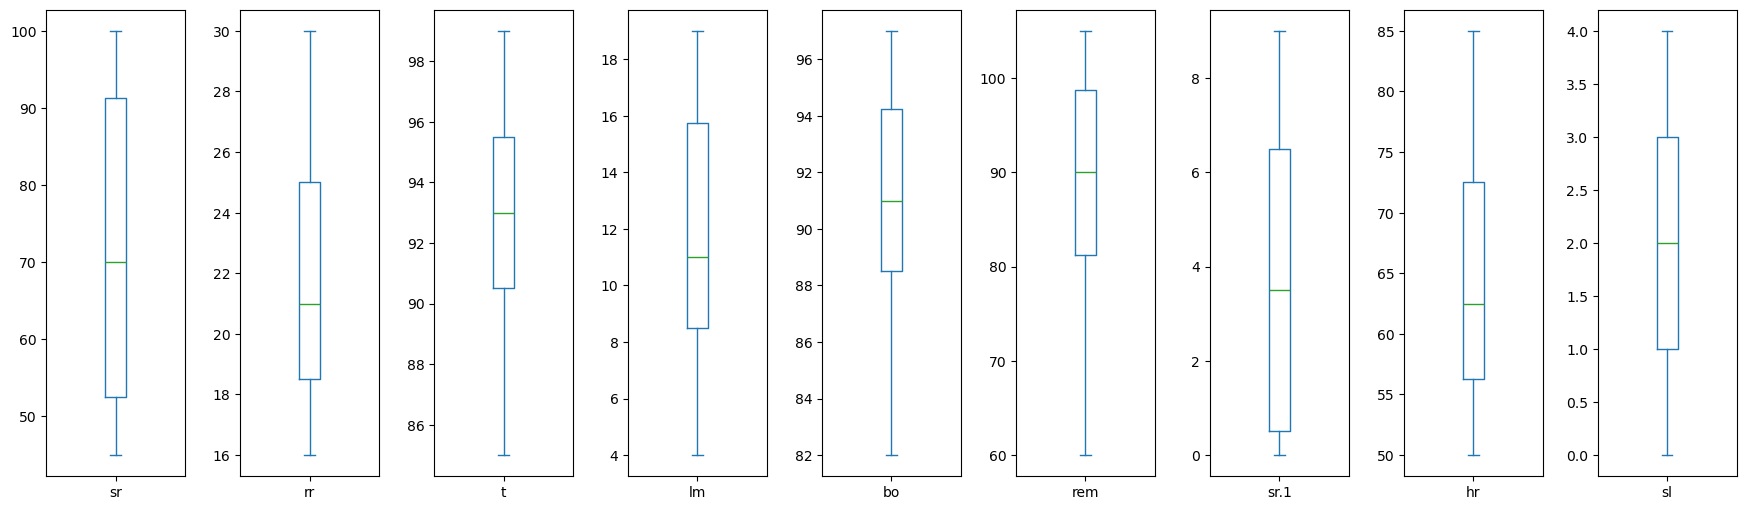

In [33]:

data.plot(kind='box', subplots=True, layout=(2,14),figsize=(14,14), sharex=False, sharey=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [35]:
# X=df.iloc[:,:-1]
X=df.drop("sl", axis =1)
Y=df.iloc[:,8]


In [37]:
X

,sr,rr,t,lm,bo,rem,sr.1,hr
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12
...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32


In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
classifier=KNeighborsClassifier(n_neighbors=3)

In [48]:
classifier.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=3)

In [50]:
Y_pred=classifier.predict(X_test)

[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


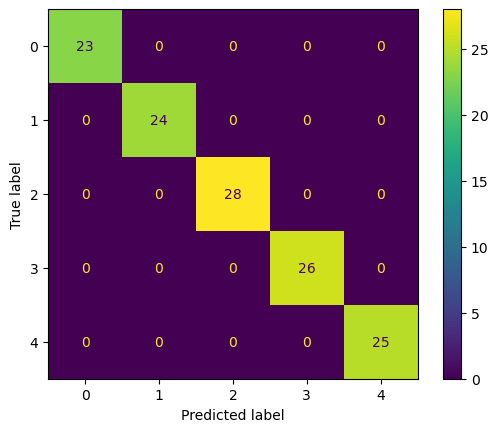

In [52]:

a= (confusion_matrix(Y_test,Y_pred))
print(a)
cm_display = ConfusionMatrixDisplay(confusion_matrix = a, display_labels = [0,1,2,3,4])
cm_display.plot()
plt.show()
knn_accuracy = accuracy_score(Y_test,Y_pred)*100

In [54]:
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



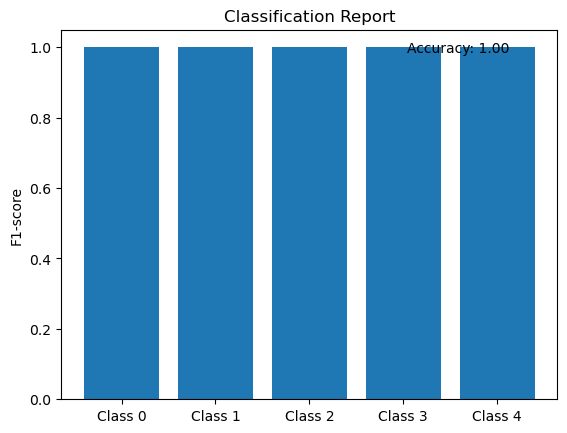

In [56]:
report = classification_report(Y_test, Y_pred, output_dict=True)
accuracy = accuracy_score(Y_test, Y_pred)

# create a bar chart
x_labels = ['Class '+str(i) for i in range(len(report)-3)]
x_pos = np.arange(len(x_labels))
accuracy_list = [report[str(i)]['f1-score'] for i in range(len(report)-3)]
plt.bar(x_pos, accuracy_list)
plt.xticks(x_pos, x_labels)
plt.ylabel('F1-score')
plt.title('Classification Report')

# add accuracy score to the chart
plt.text(0.8, 0.95, 'Accuracy: {:.2f}'.format(accuracy),
         horizontalalignment='center',
         verticalalignment='center',
         transform=plt.gca().transAxes)

# show the chart
plt.show()

In [58]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [61]:
Y_pred = classifier.predict(X_test)


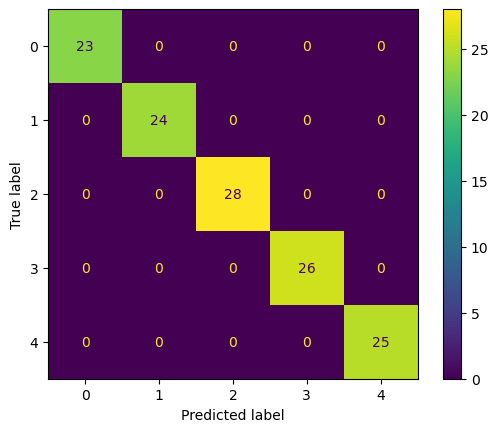

In [63]:

ac =( accuracy_score(Y_test,Y_pred))*100
cm = confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1,2,3,4])

cm_display.plot()
plt.show()

In [65]:
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [67]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
# Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, Y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, Y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(Y_test,rf_predicted))
print(confusion_matrix(Y_test,rf_predicted))
print(classification_report(Y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 97.62
Accuracy: 
 0.9761904761904762
[[23  0  0  0  0]
 [ 1 22  1  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 25  1]
 [ 0  0  0  0 25]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.92      0.96        24
           2       0.97      1.00      0.98        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



In [69]:


svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, Y_train)
svm_model_score = round(svm_model.score(X_train, Y_train) * 100, 2)
Y_predict = svm_model.predict(X_test)
svm_accuracy = accuracy_score(Y_test,Y_predict)*100
print("Accuracy:",svm_accuracy)
cm = confusion_matrix(Y_test,Y_predict)
print("Confusion Matrix is :", cm)
print(classification_report(Y_test,Y_predict))

Accuracy: 100.0
Confusion Matrix is : [[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [71]:
logreg = LogisticRegression()

# Train the model using the training sets and check score
logreg.fit(X_train, Y_train)

# Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, Y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, Y_test) * 100, 2)

# Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)

print('Accuracy: \n', accuracy_score(Y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(Y_test,log_predicted))
print('Classification Report: \n', classification_report(Y_test,log_predicted))

Logistic Regression Training Score: 
 100.0
Logistic Regression Test Score: 
 100.0
Accuracy: 
 1.0
Confusion Matrix: 
 [[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [73]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest','SVM Model', "KNN"],

    'Test Score': [ logreg_score_test, ac, random_forest_score_test,svm_accuracy,knn_accuracy]})
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score
0,Logistic Regression,100.00
1,Gaussian Naive Bayes,100.00
3,SVM Model,100.00
4,KNN,100.00
2,Random Forest,97.62


In [39]:
df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [43]:
df.dropna(inplace=True)


features = df[['rr', 'hr', 'lm', 'sr', 't']].values
labels = df['sl'].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)


# Step 5: Predict whether a person moves to the next stage or not and assign values to "move_to_next_stage" colum
df['move_to_next_stage'] = 'No'



   # Initialize all values as "No" by default

for level in np.unique(labels):
    # Filter the df for the current sleep stress level
    level_df = df[df['sl'] == level]

    if level + 1 in np.unique(labels):
        # Filter the df for the next sleep stress level
        next_level_df = df[df['sl'] == level + 1]

        if len(level_df) > 0 and len(next_level_df) > 0:
            # Split the df into features and labels for the next level
            X_train_next = next_level_df[['rr', 'hr', 'lm', 'sr', 't']].values
            y_train_next = np.where(next_level_df['sl'] == level + 1, 1, 0)

            # Train a random classifier for the next level
            clf_next_level = RandomForestClassifier(random_state=42)
            clf_next_level.fit(X_train_next, y_train_next)

            # Predict the probabilities of moving to the next level for the current level's df
            probabilities = clf_next_level.predict_proba(level_df[['rr', 'hr', 'lm', 'sr', 't']].values)[:, -1]

            # Assign "Yes" to the corresponding rows in "move_to_next_stage" column
            df.loc[df['sl'] == level, 'move_to_next_stage'] = np.where(probabilities >= 0.5, 'Yes', 'No')

# Print the modified dfset with the "move_to_next_stage" column
print(df['move_to_next_stage'])

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
625    Yes
626    Yes
627     No
628    Yes
629    Yes
Name: move_to_next_stage, Length: 630, dtype: object


In [45]:
df['move_to_next_stage'].unique()

array(['Yes', 'No'], dtype=object)

In [47]:
df['move_to_next_stage'].value_counts()

move_to_next_stage
Yes    504
No     126
Name: count, dtype: int64

In [51]:
import scipy.stats as stats
move_to_next_stage = df['move_to_next_stage']
heart_rate = df['hr']


In [53]:
heart_rate_group_1 = heart_rate[move_to_next_stage == 'No']
heart_rate_group_2 = heart_rate[move_to_next_stage == 'Yes']

In [55]:
statistic, p_value = stats.ttest_ind(heart_rate_group_1, heart_rate_group_2)


In [57]:
print("Heart Rate Comparison:")
print("Group 1 (No Move to Next Stage): Mean = {:.2f}, Std. Deviation = {:.2f}".format(heart_rate_group_1.mean(), heart_rate_group_1.std()))
print("Group 2 (Move to Next Stage): Mean = {:.2f}, Std. Deviation = {:.2f}".format(heart_rate_group_2.mean(), heart_rate_group_2.std()))
print("Statistical Comparison: t-value = {:.2f}, p-value = {:.4f}".format(statistic, p_value))

Heart Rate Comparison:
Group 1 (No Move to Next Stage): Mean = 80.00, Std. Deviation = 2.92
Group 2 (Move to Next Stage): Mean = 60.62, Std. Deviation = 6.75
Statistical Comparison: t-value = 31.47, p-value = 0.0000


In [59]:
features = df[['sr', 'rr', 'lm']].values


In [61]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)


KMeans(n_clusters=3, random_state=42)

In [63]:

cluster_labels = kmeans.labels_

In [65]:
df['sleep_quality_cluster'] = cluster_labels

In [67]:
print(df['sleep_quality_cluster'])

0      1
1      1
2      0
3      1
4      0
      ..
625    2
626    0
627    1
628    0
629    2
Name: sleep_quality_cluster, Length: 630, dtype: int32
